# Análisis Exploratorio de los datos

Incluir una breve explicación de por que realizamos un EDA

Llevar a cabo un análisis exploratorio de datos (AED) es esencial en el proceso de análisis de datos por varias razones, especialmente en lo que respecta a la preparación y limpieza de datos, y a la identificación de posibles problemas, tendencias y patrones cuando se trabaja con varios modelos y se ajustan sus hiperparámetros.



1.   **Preparación y limpieza de datos:** AED desempeña un papel crucial en la detección y el tratamiento de los problemas de calidad de los datos, como los valores que faltan, las incoherencias y los registros duplicados. Al visualizar y resumir los datos mediante estadísticas descriptivas, histogramas, diagramas de caja y diagramas de dispersión, los analistas pueden identificar estos problemas y tomar decisiones informadas sobre cómo tratarlos. Una limpieza adecuada de los datos garantiza que los modelos construidos a partir de ellos sean fiables y menos propensos a sesgos.

2.   **Identificación de problemas potenciales:** AED ayuda a detectar anomalías y valores atípicos que pueden afectar negativamente al rendimiento de los modelos de aprendizaje automático. Estos puntos de datos inusuales a veces pueden ser indicativos de errores de introducción de datos, errores de medición o auténticos valores extremos. Identificar y abordar estos problemas desde el principio puede ayudar a evitar resultados sesgados y un rendimiento impreciso del modelo.

3. **Descubrir tendencias y patrones:** AED puede revelar estructuras subyacentes, tendencias y relaciones dentro de los datos que pueden ser útiles para la ingeniería de características o la selección de modelos. Esta comprensión puede proporcionar información valiosa sobre qué variables son más relevantes para el resultado objetivo y ayudar a seleccionar modelos apropiados que puedan capturar estas relaciones de manera efectiva.

4. **Orientar la selección de modelos y el ajuste de hiperparámetros:** Al comprender la distribución y las relaciones de los datos, AED puede informar sobre la elección de los modelos adecuados y guiar el ajuste de los hiperparámetros. Por ejemplo, si los datos muestran una relación lineal, los modelos lineales como la regresión lineal pueden ser más apropiados. Si la relación no es lineal, técnicas como la regresión polinómica o las máquinas de vectores de soporte podrían ser más adecuadas. Además, AED puede ayudar a identificar la escala y la distribución de las características, lo que puede informar las decisiones sobre el escalado, la transformación o la normalización de las características. Esta información también puede utilizarse para seleccionar los hiperparámetros adecuados para determinados modelos, como el núcleo en las máquinas de vectores soporte o la profundidad de los árboles de decisión.

5. **Validación de supuestos:** Muchos modelos estadísticos y de aprendizaje automático se basan en determinados supuestos sobre los datos, como la normalidad, la homocedasticidad o la independencia de las observaciones. AED ayuda a verificar si estos supuestos se cumplen para los datos en cuestión. Si no se cumplen los supuestos, pueden considerarse transformaciones de datos adecuadas o modelos alternativos para evitar resultados sesgados o poco fiables.

6. **Reducción del sobreajuste y mejora de la generalización del modelo:** Al proporcionar información sobre la importancia y las relaciones de las características, AED puede ayudar en la selección de características y la reducción de la dimensionalidad, lo que puede evitar el sobreajuste y mejorar la generalización de los modelos. Esto es especialmente importante cuando se trabaja con datos de gran dimensión, donde el riesgo de sobreajuste es mayor.

En resumen, el análisis exploratorio de datos desempeña un papel fundamental en la preparación y limpieza de datos, la identificación de posibles problemas, la revelación de tendencias y patrones, y la orientación de la selección de modelos y el ajuste de hiperparámetros. Al incorporar el AED al proceso de análisis de datos, los analistas y científicos de datos pueden construir modelos más fiables, precisos e interpretables, lo que en última instancia conduce a una toma de decisiones más informada.


Importaciones

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import datetime
import matplotlib.pyplot as plt

from scipy.stats import bartlett, pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt



## Mount Drive Gaston

In [ ]:
# mount drive Gastón
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/Aprendizaje"
!ls

Mounted at /content/drive/
drive  sample_data
/content/drive/MyDrive/Aprendizaje
comp_st27ns1.txt.bz2  final_tree.joblib        tennis.txt
disp_st27ns1.txt.bz2  T1_TreeEvaluation.ipynb


## Mount Drive Adela

In [2]:
# mount drive Adela
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/6-2-C/AA/P1/Data"
!ls


Mounted at /content/drive/
drive  sample_data
/content/drive/MyDrive/6-2-C/AA/P1/Data
comp_st27ns1.txt.bz2  disp_st27ns1.txt.bz2


Cargamos los datos Disponibles y de Competición

In [3]:
disp_df = pd.read_csv("disp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)
comp_df = pd.read_csv("comp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)

Previo a la división de los datos en conjuntos de Entrenamiento, Set y Validación, se ha de hacer una exploración de los datos con el objetivo de comprobar la forma en la que se presentan. Para ello hemos investigado el tipo de variables con el cual trabajaremos, si existen valores nulos, filas duplicadas o incluso la correlación de los datos presentes. 
Previo a la división de los datos en conjuntos de Entrenamiento, Set y Validación, se ha de hacer una exploración de los datos con el objetivo de comprobar la forma en la que se presentan. Para ello hemos investigado el tipo de variables con el cual trabajaremos, si existen valores nulos, filas duplicadas o incluso la correlación de los datos presentes. 


### Eliminación de filas duplicadas. 
Como es posible observar, no existe ninguna fila duplicada.

In [4]:
disp_df_unicos = disp_df.drop_duplicates()
disp_df_unicos.shape

print(disp_df.iloc[:, -1:])

         salida
V1     10814100
V2      3524700
V3      2262300
V4      2414100
V5      8925600
...         ...
V4376   2586300
V4377   7096500
V4378  10694700
V4379  11154900
V4380  11047800

[4380 rows x 1 columns]


### Evaluación de valores nulos. 
Como es posible observar, no existe ningun dato nulo en el conjunto de datos.

In [5]:
print(disp_df.isnull().values.any())

False


### Evaluación de correlación de variables

Estudiar la correlación de las variables (TBD)

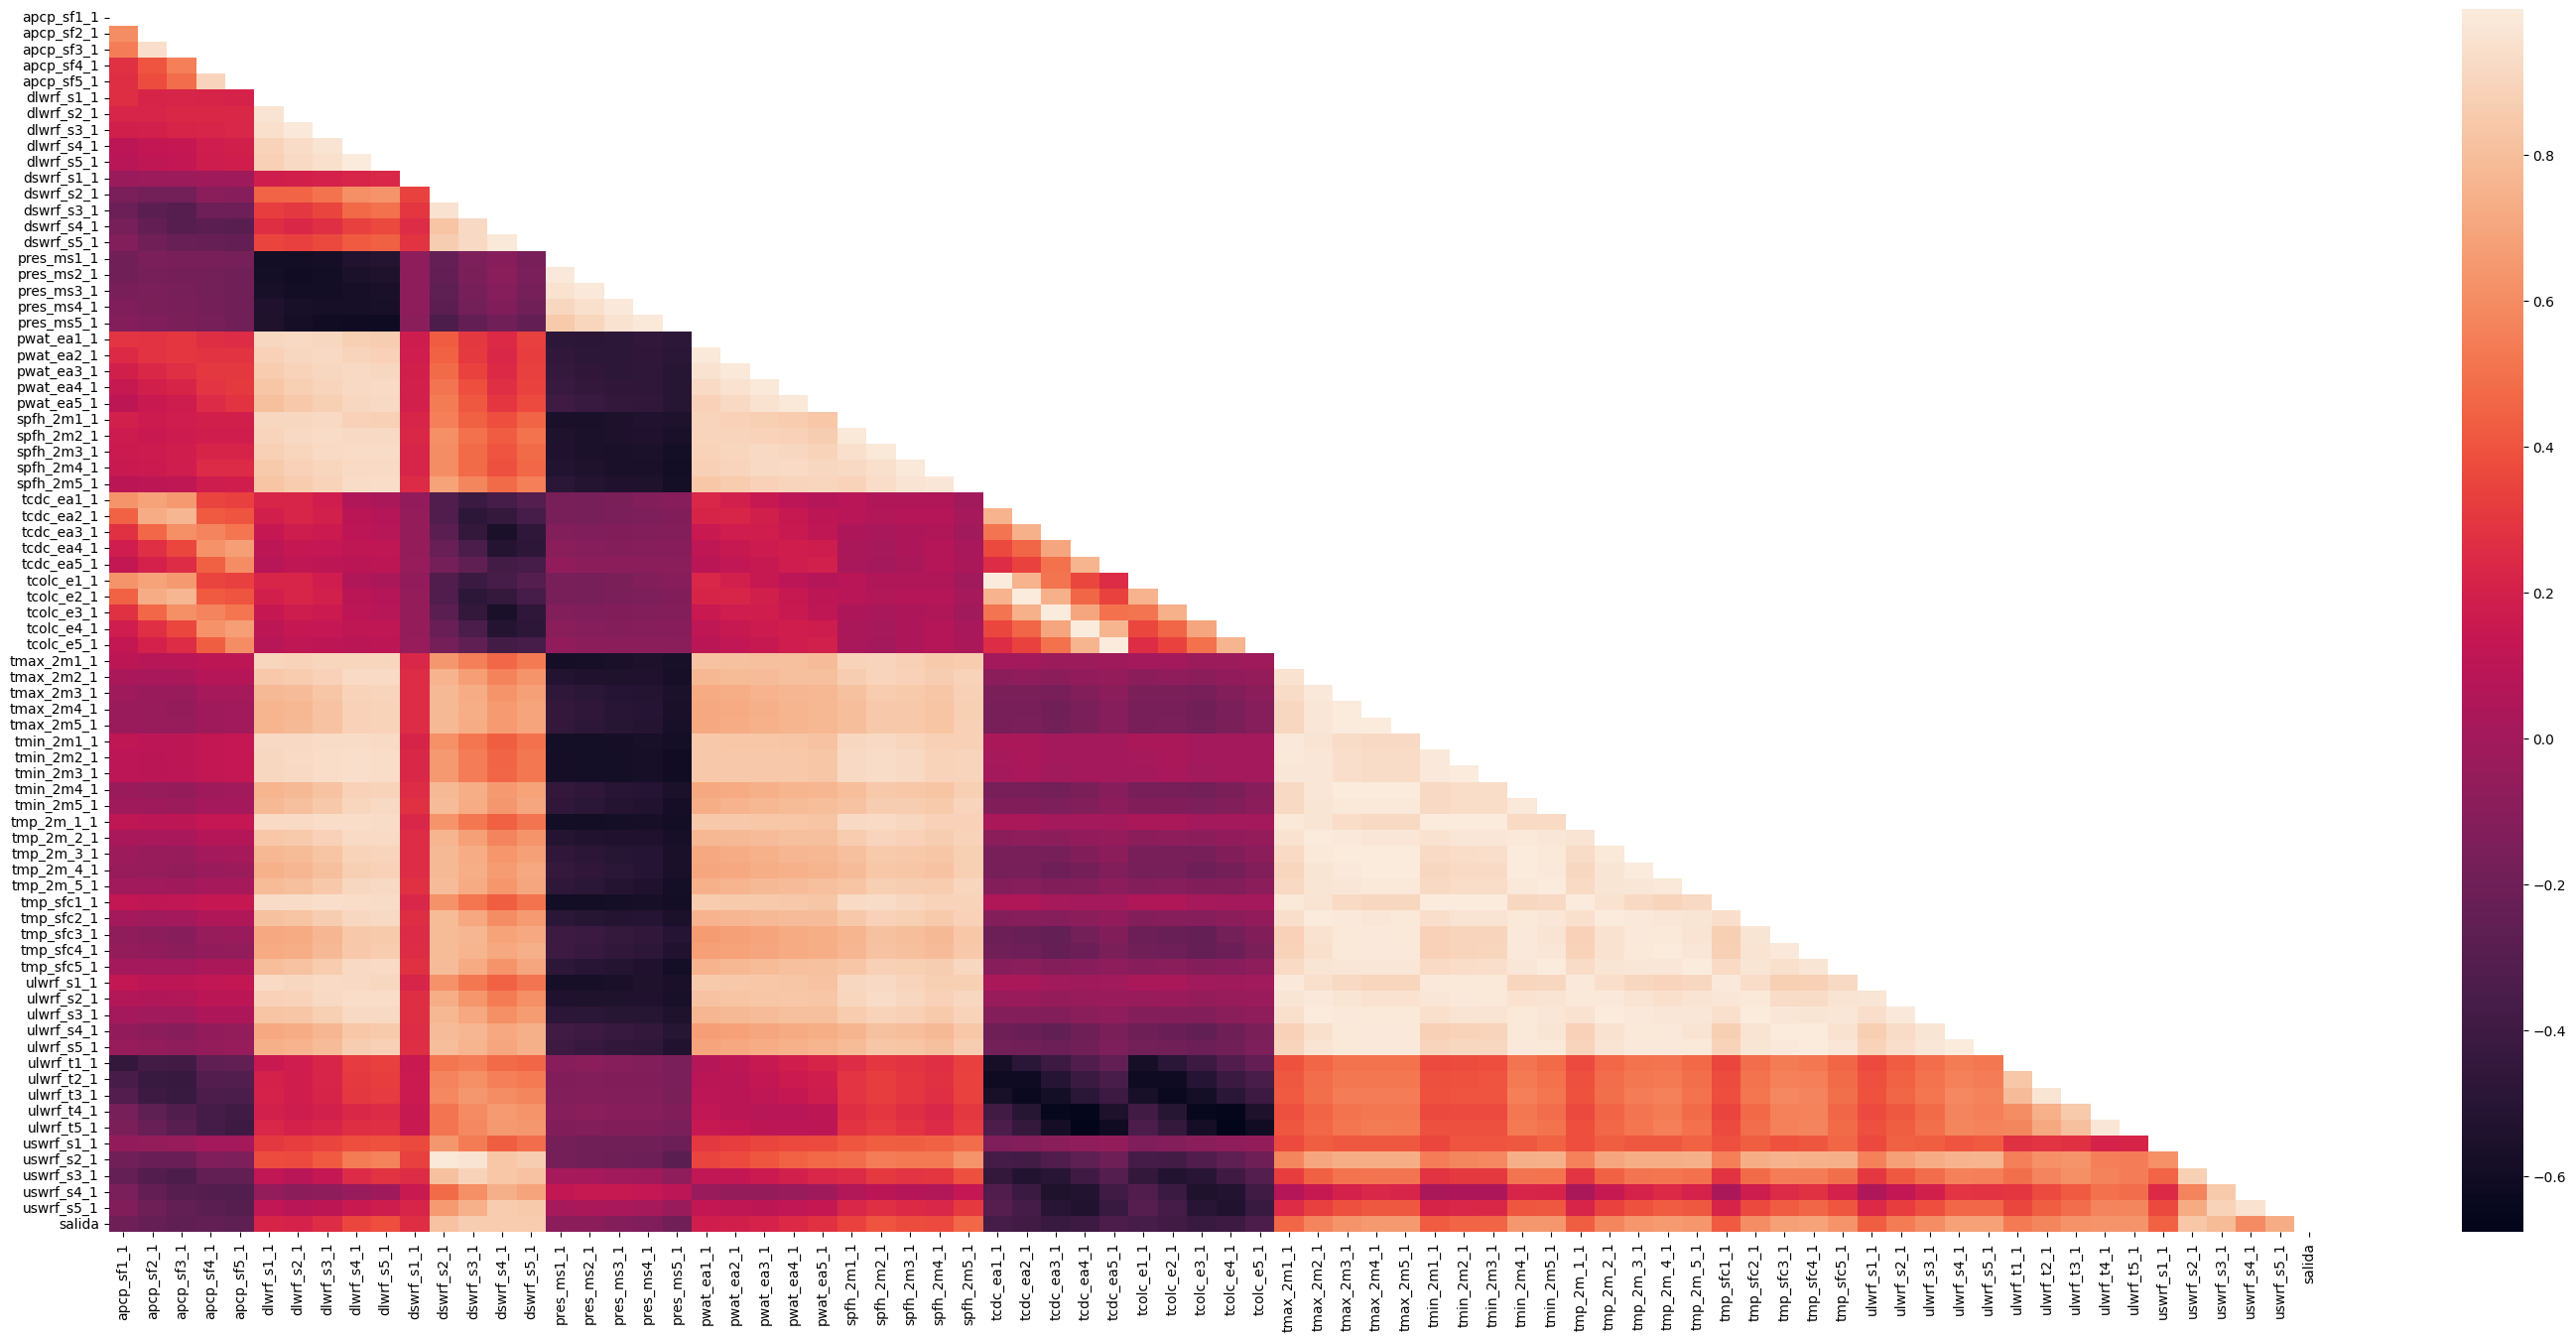

Estadístico de prueba: 7751358.776000544
Valor p: 0.0


0.0

In [6]:
# CORRELACION DE VARIABLES
def cor_matrix(df):
    #cor = disp_df.corr()[abs(disp_df.corr()) > 0.6]
    cor = disp_df.corr()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(36, 16))
    sns.heatmap(cor, mask=mask, annot=False)
    plt.show()

cor_matrix(disp_df)

# realizar el test de Bartlett
statistic, pvalue = bartlett(*disp_df.T.values)

# imprimir los resultados
print("Estadístico de prueba:", statistic)
print("Valor p:", pvalue)
pvalue
#aqui podemos ver que se rechaza la hipotesis nula de que es la matriz identidad, hay multicolinealidad, hay que eliminarla


**Comentarios derivados de la matriz de Correlación**

En este gráfioco miraremos a las zonas más claras (correlación positiva) o más oscuras (correlación negativa). De esta forma sabremos que variables afectan en gran medidas a otras. 

**Importante:** Cuando se eliminan características irrelevantes en K-NN, es importante identificar las características que tienen poca o ninguna correlación con la variable objetivo (es decir, la columna de etiquetas). Una forma común de hacerlo es calcular la correlación entre cada característica y la variable objetivo, y luego seleccionar las características con la mayor correlación.

Sin embargo, la correlación con otras características también puede ser un factor en la determinación de qué características eliminar. Por ejemplo, si tiene dos características altamente correlacionadas entre sí, es posible que desee eliminar una de ellas para evitar la multicolinealidad, que puede afectar negativamente el rendimiento de su modelo K-NN.

*   Mismos atributos su correlación es máxima = 1 (No muy potente).




## Separación en conjuntos de Entrenamiento, Validación y Test

In [7]:
#Creamos el conjunto de entrenamiento separando X e Y
#Columnas con datos de entrada
input_cols = disp_df.columns[:75]
#Número de filas correspondiente a los 8 primeros años - Entrenamiento
n_rows_train = int((disp_df_unicos.shape[0]*8)/12)

#Creamos el subset para entrenamiento
subset_df = disp_df.iloc[:n_rows_train]

#Datos de entrada y salida subset de entrenamiento
X_train_df = subset_df.iloc[:, :75]
y_train_df = subset_df.iloc[:, -1:]

# Crear el conjunto de validación 
#Número de filas correspondiente a los 2 años - Validación
n_rows_val = int((disp_df_unicos.shape[0]*2)/12)

start_index = disp_df_unicos.shape[0] - (n_rows_val*2)
end_index = disp_df_unicos.shape[0] - (n_rows_val)
subset_val_df = disp_df.iloc[start_index:end_index:,:]

X_val_df = subset_val_df.iloc[:, :75]
y_val_df = subset_val_df.iloc[:, -1:]

#Creamos el conjunto de test de manera manual
n_rows_test = int((disp_df_unicos.shape[0]*2)/12)

test_df = disp_df.iloc[-n_rows_test:, :]
print(test_df)

input_cols = disp_df.columns[:75]
output_col = disp_df.columns[-1]

X_test_df = test_df.loc[:, input_cols]
y_test_df = test_df.loc[:, output_col]





       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V3651    0.000000    0.000000    0.000000    0.000000    0.000000  223.426755   
V3652    0.000000    0.000000    0.000000    0.000000    0.000000  240.940893   
V3653    0.190909    0.235455    1.545455    3.620000    4.291818  334.705547   
V3654    0.372727    0.080000    0.152727    0.033636    0.067273  382.270236   
V3655    0.170909    0.088182    0.311818    0.426364    1.251818  367.165677   
...           ...         ...         ...         ...         ...         ...   
V4376    0.103636    0.031818    0.275455    1.363636    2.723636  290.259560   
V4377    0.042727    0.011818    0.005455    0.000000    0.000000  281.187456   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  258.991619   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  267.316595   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  265.567166   

       dlwrf_s2_1  dlwrf_s3

## Regresor Dummy

In [8]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_df, y_train_df)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_val_df, regr_mean.predict(X_val_df)))
r2_mean = metrics.r2_score(y_val_df, regr_mean.predict(X_val_df))

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_val_df, regr_mean.predict(X_val_df))

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val_df, regr_mean.predict(X_val_df))

# Calculate R-squared score
r2_score = r2_score(y_val_df, regr_mean.predict(X_val_df))

print("MAE: ",mae)
print("MSE: ",mse)
print("R2: ",r2_score)



MAE:  6889559.834828299
MSE:  63181800761365.26
R2:  -0.0008890939076611204


### Explicación de estudio de métricas. 

Las métricas de evaluación son una forma de medir qué tan bien está funcionando un modelo de aprendizaje automático. En el caso de los modelos de regresión, estas métricas evalúan qué tan bien el modelo puede predecir los valores continuos de la variable objetivo.

Algunas de las métricas de evaluación comunes para los modelos de regresión son el error absoluto medio (MAE), el error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado). El MAE y el MSE miden la distancia entre las predicciones del modelo y los valores reales, mientras que el R-cuadrado mide qué tan bien el modelo se ajusta a los datos.

Por otro lado, las métricas de evaluación de clasificación, como la precisión, la sensibilidad (recall), la especificidad y la puntuación F1, miden qué tan bien el modelo puede predecir las etiquetas de clase binarias o múltiples.

Entonces, como el modelo DummyRegressor es un modelo de regresión, no tiene sentido calcular las métricas de evaluación de clasificación, ya que estas están diseñadas para medir la capacidad del modelo para clasificar los datos en categorías discretas. En cambio, se deben usar las métricas de evaluación de regresión adecuadas para evaluar el rendimiento del modelo de regresión.


El **MAE** (Mean Absolute Error) mide la magnitud promedio de los errores en las predicciones del modelo. Es una medida de la distancia promedio entre las predicciones del modelo y los valores reales, y nos indica qué tan cerca están las predicciones del modelo de los valores reales en términos absolutos. Un valor bajo de MAE indica que el modelo tiene un buen rendimiento en la predicción de los valores reales.

El **MSE** (Mean Squared Error) mide el promedio de los errores al cuadrado en las predicciones del modelo. Al elevar los errores al cuadrado, el MSE da más peso a los errores grandes y menos peso a los errores pequeños. El MSE nos indica qué tan bien el modelo está prediciendo la variabilidad en los datos. Un valor bajo de MSE indica que el modelo tiene un buen rendimiento en la predicción de la variabilidad de los valores reales.

El **R-cuadrado** es una medida de cuánta varianza en los datos de la variable objetivo es explicada por el modelo. El R-cuadrado tiene un valor entre 0 y 1, y cuanto más cercano a 1, mejor es el rendimiento del modelo. Si el valor de R-cuadrado es 0, significa que el modelo no explica ninguna de la varianza en los datos, mientras que un valor de 1 significa que el modelo explica toda la varianza en los datos.

## Regresor Lineal



RMSE de regresión lineal: 3092160.5617226223


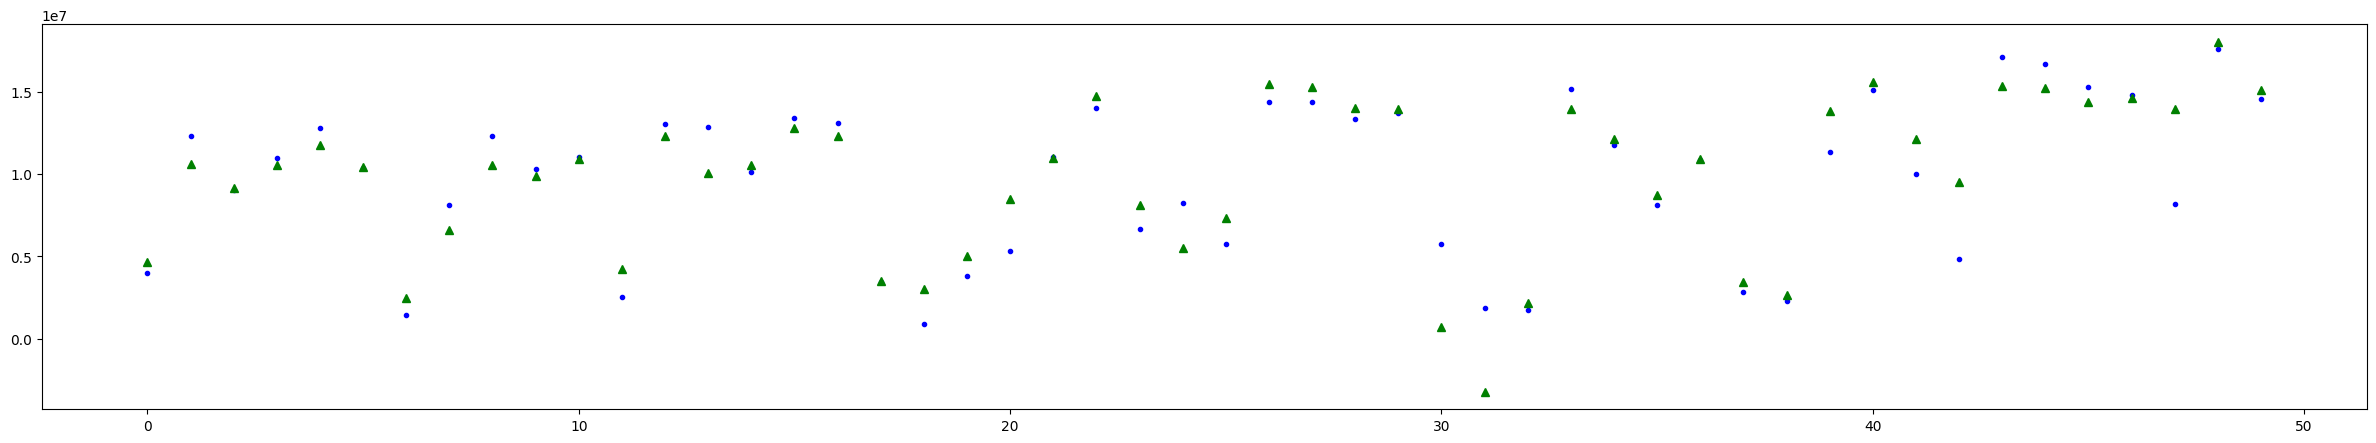

In [10]:
def pintaResultadosRL(reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_val_df[:n].size)
  pred = reg.predict(X=X_val_df)
  plt.plot(x, y_val_df[:n], 'b.', x, pred[:n], 'g^')

def rmse(y, y_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y, y_pred))

scaler = StandardScaler()
reg_lin = LinearRegression()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

np.random.seed(77)
pipe_regr.fit(X=X_train_df, y=y_train_df)
print(f"RMSE de regresión lineal: {rmse(y_val_df, pipe_regr.predict(X=X_val_df))}")
pintaResultadosRL(pipe_regr,50)



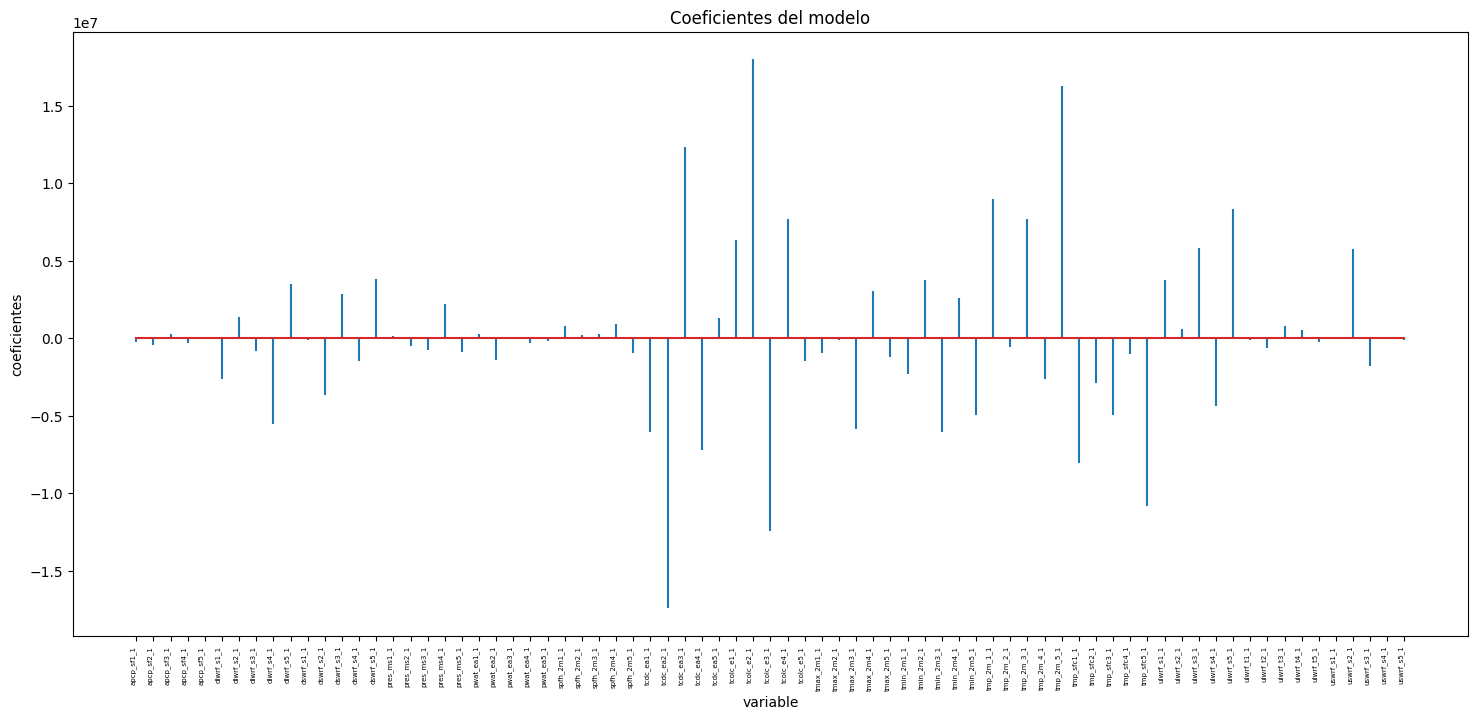

In [12]:
#Estudiamos los coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_df.columns.values.tolist(),
                         'coef': pipe_regr['REGL'].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(18, 7.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');


### Estudio de regularización Ridge - Teoría

La regresión lineal con regularización Ridge es una técnica utilizada para evitar el sobreajuste en modelos de regresión lineal. Aquí te explico los conceptos más importantes y aspectos claves que debes conocer para realizar una regresión lineal con regularización Ridge:

Regresión Lineal: La regresión lineal es una técnica que se utiliza para predecir el valor de una variable continua en función de una o más variables independientes. Se ajusta una línea recta a los datos y se utiliza esta línea para hacer predicciones.

Sobreajuste: El sobreajuste es un problema común en la regresión lineal donde el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a nuevos datos. Esto puede llevar a una alta varianza en las predicciones del modelo.

Regularización: La regularización es una técnica utilizada para reducir la varianza del modelo y evitar el sobreajuste. En la regresión lineal con regularización Ridge, se agrega una penalización a los coeficientes de la regresión para reducir su magnitud.

Coeficientes: Los coeficientes son los valores que multiplican las variables independientes en la ecuación de regresión lineal. En la regresión lineal con regularización Ridge, estos coeficientes se penalizan para reducir su magnitud.

Parámetro de regularización: El parámetro de regularización (también conocido como lambda) controla la magnitud de la penalización aplicada a los coeficientes de la regresión. Un valor alto de lambda conduce a una mayor penalización y, por lo tanto, a coeficientes más pequeños.

Validación cruzada: La validación cruzada es una técnica utilizada para evaluar la capacidad de generalización del modelo. En la regresión lineal con regularización Ridge, se utiliza la validación cruzada para encontrar el valor óptimo de lambda que minimiza el error de predicción del modelo.

Normalización: La normalización se utiliza para estandarizar las variables independientes y evitar problemas de escala en la regresión. En la regresión lineal con regularización Ridge, se recomienda normalizar las variables antes de ajustar el modelo para obtener resultados óptimos.

En resumen, la regresión lineal con regularización Ridge es una técnica útil para evitar el sobreajuste en modelos de regresión lineal. La elección del parámetro de regularización es un aspecto clave que debe ser optimizado mediante la validación cruzada. La normalización de las variables también es importante para obtener resultados precisos.

RMSE de regresión lineal - Ridge: 3088580.877351722


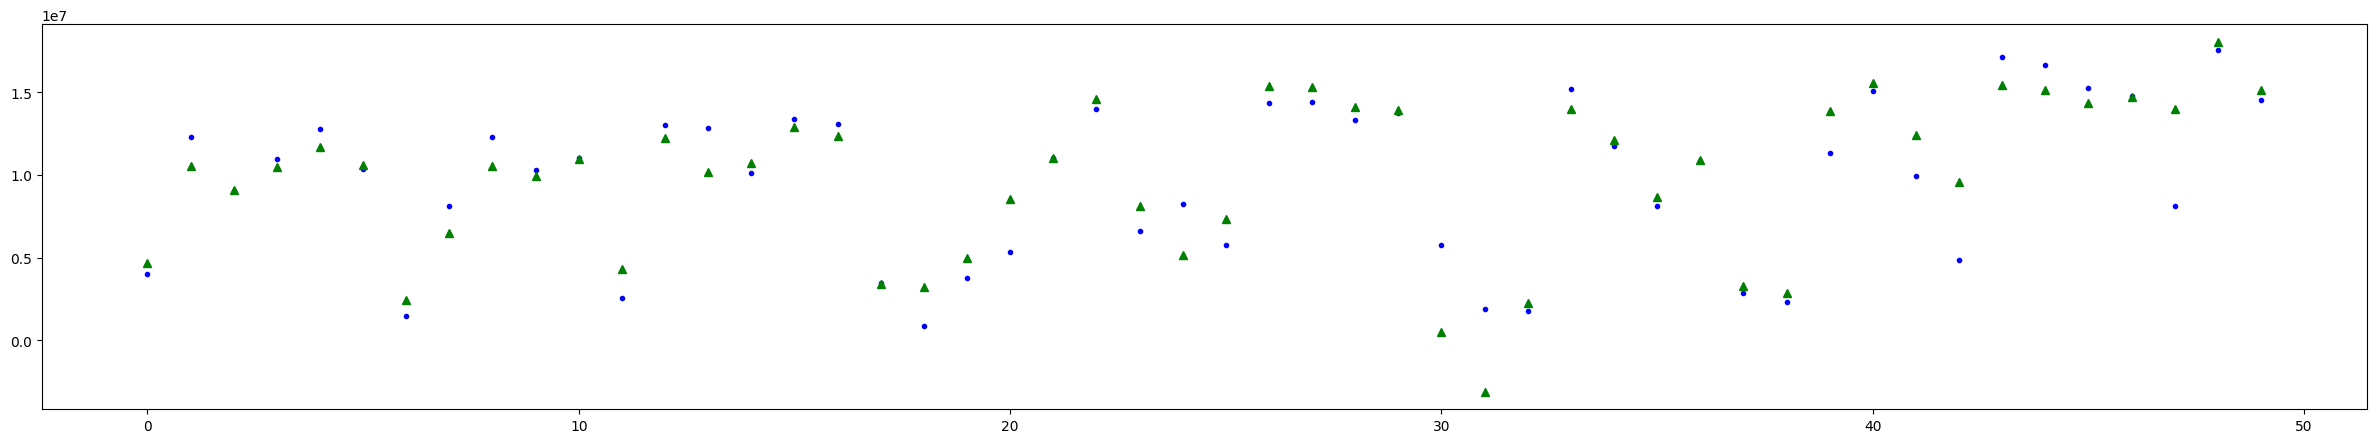

In [13]:
# Por defecto RidgeCV utiliza el mean squared error
regrRidge = RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

np.random.seed(77)
regresionRidge = regrRidge.fit(X = X_train_df, y = y_train_df)
print(f"RMSE de regresión lineal - Ridge: {rmse(y_val_df, regrRidge.predict(X=X_val_df))}")
pintaResultadosRL(regrRidge,50)

In [ ]:
#Evolución de coeficientes en función de Alpha

alphas = regrRidge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_df, y_train_df)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()


#AQUI DEBEMOS HACER UN ESTUDIO DE LA MULTICOLONEIDAD. SINO RIDGE NO SERÁ EFECTIVO: 

This warning message indicates that the matrix used to solve the linear regression problem in the Ridge model is ill-conditioned, which means that it is very close to being singular or not invertible. This can happen when the columns of the design matrix (X) are linearly dependent or nearly linearly dependent, which makes it difficult to estimate the coefficients accurately.

In this case, the warning message suggests that the solution obtained from the Ridge model may not be accurate, which could lead to unreliable predictions. It is possible that increasing the regularization parameter (alpha) may help to improve the stability of the solution and reduce the impact of the ill-conditioned matrix.

It is also a good idea to check the data to see if there are any issues with multicollinearity or other problems that could lead to ill-conditioned matrices. This can be done by inspecting the correlation matrix of the predictors, for example, or by performing other diagnostic tests on the data.

Mejor valor de alpha encontrado: 0.002437444150122222


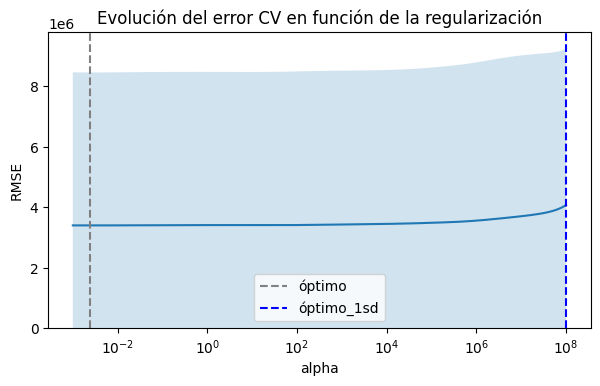

In [17]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = regrRidge.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = regrRidge.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = regrRidge.alphas[np.argmin(rmse_cv)]
optimo_1sd   = regrRidge.alphas[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(regrRidge.alphas, rmse_cv)
ax.fill_between(
    regrRidge.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrRidge.alpha_}")

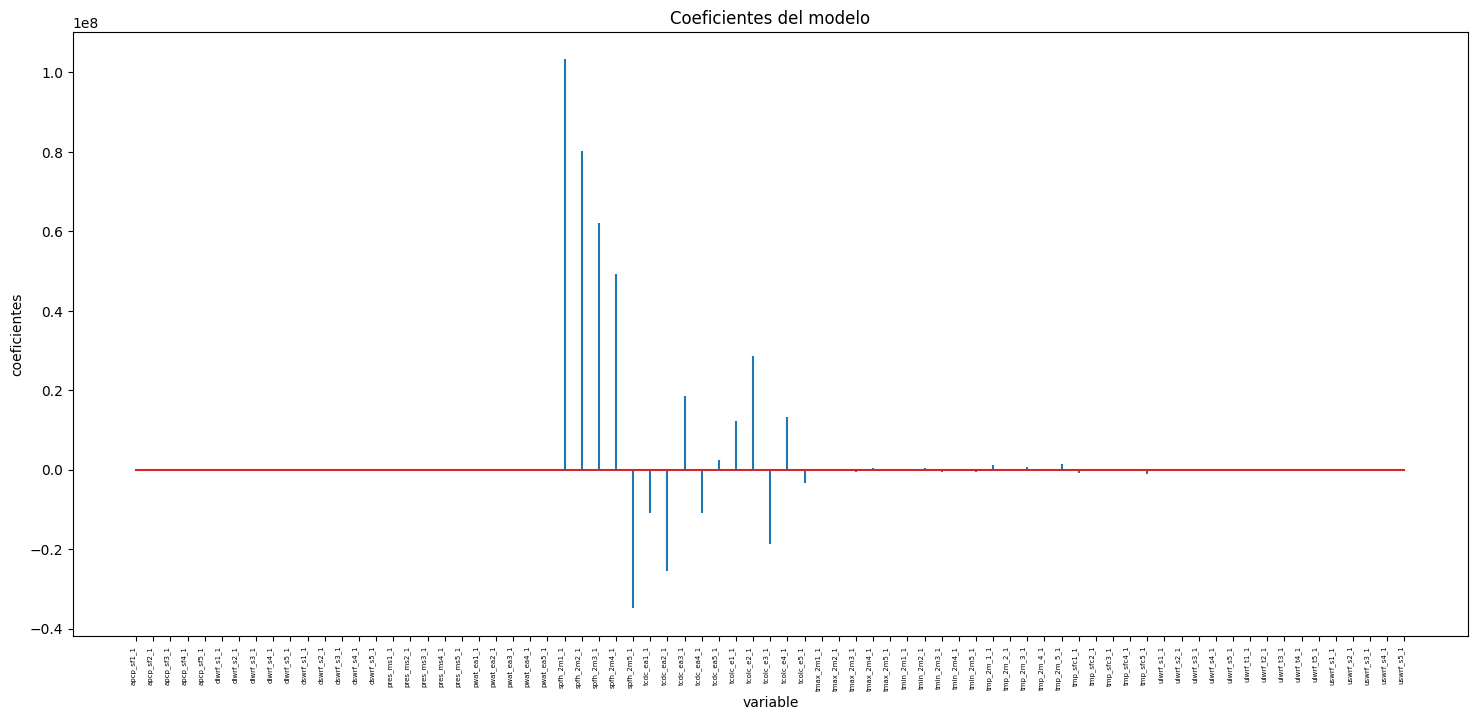

In [19]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_df.columns.values.tolist(),
                         'coef': regrRidge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(18, 7.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Observamos como con Ridge, muchos coeficientes han sido eliminados

# Lasso - Teoría

RMSE de regresión lineal: 3092170.68112752


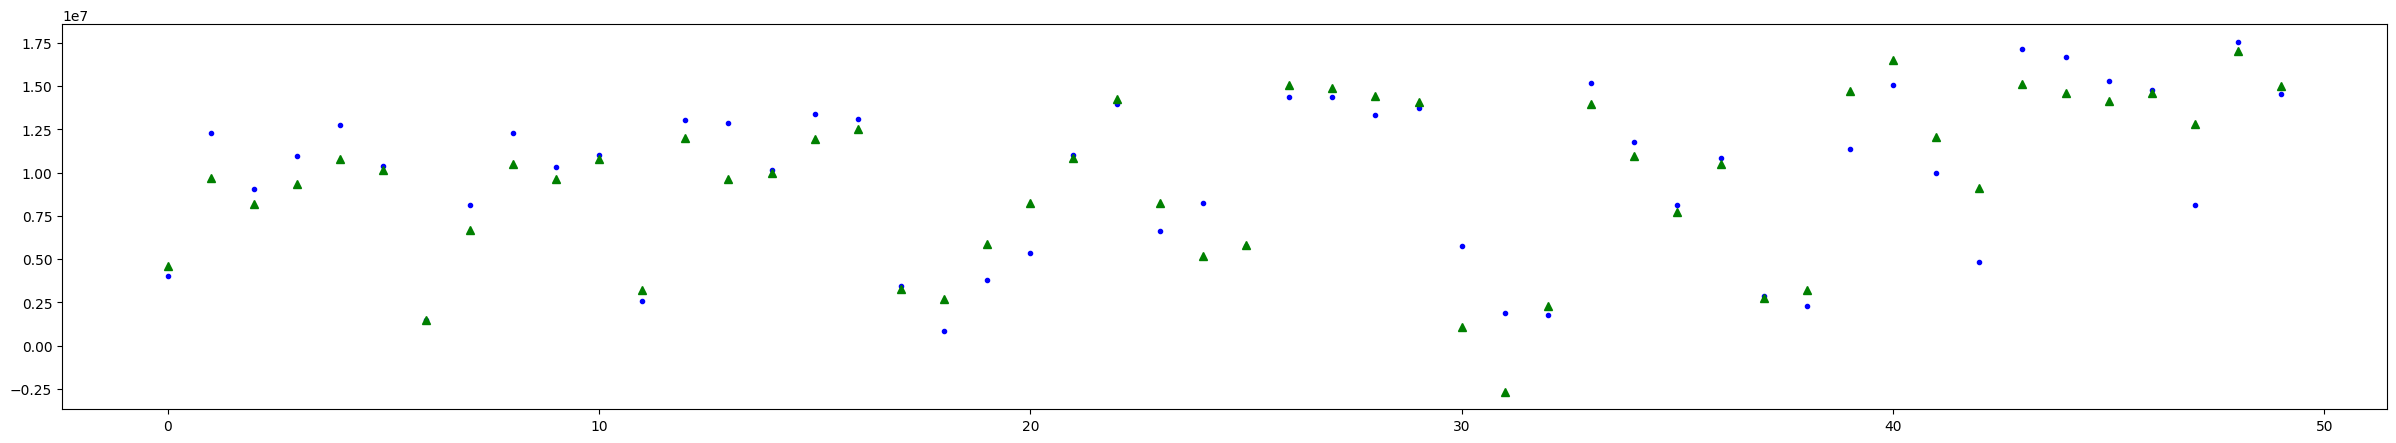

In [43]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
regrLasso = LassoCV(
            alphas          = np.logspace(-9, 3, 999999),
            cv              = 10,
            max_iter        = 99999,
            tol             = 0.085
         )

np.random.seed(42)
_ = regrLasso.fit(X = X_train_df, y = y_train_df.values.flatten())
print(f"RMSE de regresión lineal: {rmse(y_val_df, regrLasso.predict(X=X_val_df))}")
pintaResultadosRL(regrLasso,50)

np.logspace es una función de NumPy que devuelve un arreglo de valores equiespaciados en una escala logarítmica. Los tres argumentos de np.logspace son:

1. El exponente del inicio de la escala.
2. El exponente del final de la escala.
3. El número de elementos en la escala.

En este caso, np.logspace(-9, 3, 200) se utiliza para crear una secuencia de 200 valores de alpha equiespaciados en una escala logarítmica desde 10^-9 hasta 10^3. Estos valores se utilizan como valores posibles de alpha en la selección del modelo Lasso mediante validación cruzada (LassoCV).

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = regrLasso.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, tol = 0.085)
    modelo_temp.fit(X_train_df, y_train_df)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([None,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

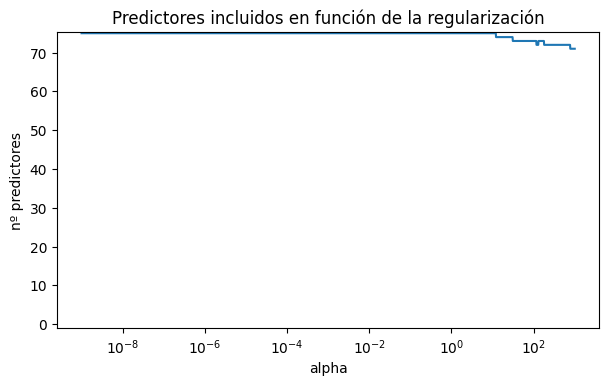

In [40]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = regrLasso.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, tol = 0.085)
    modelo_temp.fit(X_train_df, y_train_df)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

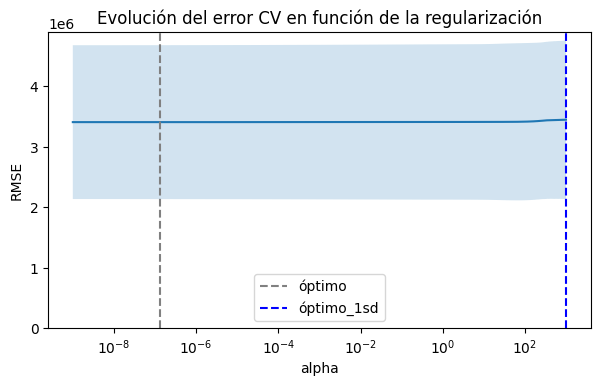

In [41]:
# Evolución del error en función de alpha
# ==============================================================================
# regrLasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = regrLasso.mse_path_.mean(axis=1)
mse_sd = regrLasso.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = regrLasso.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = regrLasso.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(regrLasso.alphas_, rmse_cv)
ax.fill_between(
    regrLasso.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();


In [42]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrLasso.alpha_}")

Mejor valor de alpha encontrado: 1.3154051255060556e-07


In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_df.columns.values.tolist(),
                         'coef': regrLasso.coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

### Elastic Net



In [ ]:
# Por defecto ElasticNetCV utiliza el mean squared error
regrElastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
np.random.seed(42)
_ = regrElastic.fit(X = X_train_df, y = y_train_df)
print(f"RMSE de regresión lineal: {rmse(y_val_df, regrElastic.predict(X=X_val_df))}")
pintaResultadosRL(regrElastic,50)

In [ ]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# regrElastic.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = regrElastic.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [regrElastic.l1_ratio, regrElastic.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrElastic.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {regrElastic.l1_ratio_}")

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_df.columns.values.tolist(),
                         'coef': regrElastic.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

### Comparacion de Modelos

In [ ]:
rmse_lineal = rmse(y_vald_df, pipe_regr.predict(X=X_train_df))
rmse_ridge = rmse(y_vald_df, regrRidge.predict(X=X_train_df))
rmse_lasso = rmse(y_vald_df, regrLasso.predict(X=X_train_df))
rmse_elastic = rmse(y_vald_df, regrElastic.predict(X=X_train_df))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
# Coeficientes de los distintos modelos
# ==============================================================================
d = [["Lineal", np.count_nonzero(np.abs(reg_lin.coef_.flatten()) > 0.5)],
     ["Ridge", np.count_nonzero(np.abs(regrRidge.coef_.flatten()) > 0.5)],
     ["Lasso", np.count_nonzero(np.abs(regrLasso.coef_.flatten()) > 0.5)],
     ["Elastic Net", np.count_nonzero(np.abs(regrElastic.coef_.flatten()) > 0.5)]]

df = pd.DataFrame(d, columns = ['Modelo','Núm. predictores'])
print(df)

## K - NN

### Data Preparation

Para usar K-NN se debe preparar los datos correctamente. Las técnicas de aprendizaje automático que se basan en la medición de distancias, como las redes de neuronas, el k-NN y el SVM, requieren que los atributos estén **rescalados** para evitar que el atributo con mayor rango de valores tenga una influencia desproporcionada en la medida de distancia.

**Manejo de valores faltantes:** K-NN no maneja bien los valores faltantes, por lo que es importante manejarlos adecuadamente. Se pueden imputar los valores faltantes utilizando técnicas como la imputación de la media, la imputación de la mediana o mediante el uso de un modelo predictivo para imputar valores faltantes.

**Eliminación de características irrelevantes:** K-NN es sensible a las características irrelevantes, por lo que es importante eliminarlas antes de entrenar el modelo. Se pueden utilizar técnicas de selección de características, como el análisis de correlación o la información mutua, para identificar y eliminar características irrelevantes.

**Manejo de variables categóricas:** K-NN es un algoritmo basado en distancia que calcula distancias entre puntos de datos basándose en las características. Por lo tanto, es importante manejar adecuadamente las variables categóricas. Se pueden convertir las variables categóricas en variables numéricas utilizando técnicas como la codificación one-hot o la codificación de etiquetas.

In [ ]:
#Evitamos que se produzca multicolinealidad: aquellas variables que tienen alta correlación con otras variables del modelo.

import pandas as pd

# Cargar la base de datos
disp_df_knn = pd.read_csv("disp_st27ns1.txt.bz2",compression="bz2",index_col=0)
comp_df_knn = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)
# Calcular la matriz de correlación
corr_matrix = disp_df_knn.corr().abs()

# Seleccionar la matriz triangular superior
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontrar las características altamente correlacionadas - >.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(disp_df_knn.shape)
# Eliminar las características altamente correlacionadas
disp_df_knn.drop(to_drop, axis=1, inplace=True)

print(disp_df_knn.shape)

(4380, 76)
(4380, 25)


<ipython-input-9-fd4faa671302>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Estandarizamos los datos de entrada de los conjuntos de entrenamiento, validación y test
ss = StandardScaler()
X_train_set_estandar = ss.fit_transform(X_train_df)
X_val_set_estandar = ss.fit_transform(X_val_df)
X_test_set_estandar = ss.fit_transform(X_test_df)

#Aquí se pierden las columnas por lo que han de ser recuperadas. 
columns = X_train_df.columns.values
X_train_df_estandar = pd.DataFrame(X_train_set_estandar, columns=columns)
X_val_df_estandar = pd.DataFrame(X_val_set_estandar, columns=columns)
X_test_df_estandar = pd.DataFrame(X_test_set_estandar, columns=columns)

print(X_train_df_estandar)
print(X_val_df_estandar)
print(X_test_df_estandar)

y_train_ndarray = y_train_df.values



#Eliminamos valores ausentes
missing_values = np.isnan(X_train_set_estandar)
if np.any(missing_values):
    # Impute missing values with mean imputation
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train_df_estandar = imputer.fit_transform(X_train_df_estandar)

 



      apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
0      -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -0.607688   
1      -0.294642   -0.255085   -0.270946   -0.248605   -0.153840   -1.279998   
2      -0.141169   -0.236787   -0.254519   -0.291479   -0.304275   -0.843463   
3      -0.293519   -0.251273   -0.275702   -0.300726   -0.307636   -1.191572   
4      -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.577182   
...          ...         ...         ...         ...         ...         ...   
2915   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.977959   
2916   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.888606   
2917   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.476844   
2918   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.548013   
2919   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.712972   

      dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_

## K-NN Execution


In [ ]:
# Here, we set our model to KNN with k=5
clf_KNN = KNeighborsRegressor()

#We train it
clf_KNN.fit(X_train_df_estandar.values, y_train_df.values.flatten())


# We obtain predictions on the val set
y_val_pred = clf_KNN.predict(X_val_df_estandar)

# Calculate mean absolute error (MAE)
print(y_val_df.values.flatten()) 
      
print(y_val_pred)
mae = mean_absolute_error(y_val_df.values.flatten(), y_val_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val_df, y_val_pred)

print(type(y_val_pred.astype(int)[0]))
print(y_val_pred.astype(int))

# Calculate R-squared score
#r2 = r2_score(y_val_df.values.flatten(), y_val_pred.astype(int))


print("6889559.834828299")
print("MAE: ",mae)
print("MAE difference with Dummy", mae-66889559.834828299)
print("MSE: ",mse)
print("MSE difference with Dummy", mse-63181800761365.26)
#print("R2: ",r2)



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


[ 3991800 12313200  9034500 10980000 12767400 10368000  1451100  8116800
 12311700 10316100 11017500  2552700 13047300 12868200 10141200 13366500
 13112400  3459600   868800  3798600  5346300 11014500 13977900  6637800
  8221800  5742900 14365200 14390400 13305300 13726200  5763900  1889700
  1748700 15181200 11770500  8137800 10821900  2848200  2310600 11347200
 15068100  9966900  4858200 17116200 16653900 15293100 14791500  8146200
 17562000 14540400 11147400  6211200 17061000 16573500 18832200 17291700
 15899700  2707800 16879800 20551500 20323200  5394600  7878000 21871200
 21298500 21176100 12266100  6456600  5476800 22479900 21954000  3056400
 20292000 20033400 19861500  4309200  9626100  9378600  3829800  1583700
 17917500 17320800 23672700 22510500  4897500  2260500 10355100 22966200
 22000200 17073600  3305100 23749200 24539700  9051000 25378500 25035000
 24867300 13528200   836700  5257800 25273500 26135400 19941900 21351000
 12171300 23834100 21785700  7821300 24575100 18037

## K-NN busqueda de mejores hiperparámetros

Los hiperparámetros a realizar búsqueda son los siguientes: 



*   K- número de vecinos (n_neighbors)
*   Weights (distance, uniform)
*   La métrica de distancia utilizada (por defecto, la distancia euclidiana)


La métrica de distancia utilizada en K-NN es una medida de similitud que se utiliza para determinar la distancia entre dos puntos de datos. La métrica de distancia por defecto en la mayoría de los casos es la distancia euclidiana, pero sklearn permite especificar otras métricas, como la distancia de Manhattan, la distancia de Minkowski, la distancia de Mahalanobis, entre otras.

El radio de búsqueda es un hiperparámetro que se utiliza solo en el caso de K-NN de radio. En este caso, en lugar de buscar los k vecinos más cercanos, se buscan todos los puntos dentro de un radio especificado alrededor del punto de consulta. Este radio puede ser un valor fijo o puede ser un parámetro a ajustar.

El método de búsqueda de vecinos más cercanos es un algoritmo utilizado para encontrar los k vecinos más cercanos a un punto de consulta. Sklearn proporciona varios métodos de búsqueda, como el método de árbol KD, el método de búsqueda de fuerza bruta, el método de bola de árbol, entre otros. El método de árbol KD es el método por defecto utilizado en sklearn debido a su eficiencia en espacios de alta dimensión.

El valor de p es un parámetro utilizado en la distancia de Minkowski, que es una generalización de la distancia euclidiana y de la distancia de Manhattan. Si p=1, se utiliza la distancia de Manhattan, si p=2, se utiliza la distancia euclidiana, y para otros valores de p se utiliza la distancia de Minkowski. Este parámetro puede ser un hiperparámetro a ajustar para encontrar el valor óptimo que se ajuste a los datos.


Realizaremos 1 bloque: 

1.   Primer bloque: n_neighbors, weights, métrica de distancia.

Método de búsqueda aplicamos KFold y no fuewrza bruta pues es malo para una gran cantidad de datos como es el caso. 

¿Hacemos Kfold?

El numero CV 5-10 para conjuntos pequeños. 


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


#En este apartado haremos una búsqueda de los mejores hiperparámetros 
#Creamos las listas en las que haremos el análisis

weights=['uniform', 'distance']
distances = ['euclidean','manhattan','minkowski']
cv_kfold = [5,10,50,100,200]
neighbors_range = [5, 10, 15, 20, 25, 30, 50, 100]

best_score = float('inf')
best_weights = None
best_distance = None
best_cv = None
best_n = None

for n in neighbors_range:
  for weight in weights:
    for distance in distances:
      for cv in cv_kfold:
        knn = KNeighborsRegressor(n_neighbors=n, weights=weight, metric=distance)
        scores = cross_val_score(knn, X_train_df, y_train_df, cv=cv, scoring='neg_mean_squared_error')
        avg_score = -scores.mean()
        if avg_score < best_score:
          best_score = avg_score
          best_weights = weight
          best_distance = distance
          best_cv = cv
          best_n = n

# print the best configuration of hyperparameters
print(f"Best score: {best_score}")
print(f"Best weights: {best_weights}")
print(f"Best distance metric: {best_distance}")
print(f"Best number of neighbors: {best_n}")
print(f"Best value of K for K-fold cross-validation: {best_cv}")



KeyboardInterrupt: ignored

##Tuples 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import time

# Create an empty list to store the configurations and their scores
cv_results = []
weights=['uniform', 'distance']
distances = ['euclidean','manhattan','minkowski']
neighbors_range = range (1,100)

start_time = time.time()  # Registra el tiempo de inicio

# Loop through all the hyperparameter combinations
for n in neighbors_range:
  for weight in weights:
    for distance in distances:
      print("N: ",n," | Weight: ", weight, " | Distance: ",distance)

      knn = KNeighborsRegressor(n_neighbors=n, weights=weight, metric=distance)
      knn.fit(X_train_df_estandar, y_train_df)
      score = knn.score(X_val_df_estandar, y_val_df)
      # Append a tuple containing the configuration values and its score to the list
      cv_results.append((n, weight, distance, score))

# Sort the list of configurations by score (i.e., by the last element of the tuple)
cv_results.sort(key=lambda x: x[-1], reverse=True)

print()
print()

# Print the best configuration (i.e., the one with the lowest score)
print("Best configuration:", cv_results[0][:-1])  # Print all configuration values except for the score

# Access the second best configuration
print("Second best configuration:", cv_results[1][:-1])

end_time = time.time()  # Registra el tiempo de finalización
elapsed_time = end_time - start_time  # Calcula el tiempo transcurrido

print("Tiempo de Ejecución: , ",elapsed_time)

N:  1  | Weight:  uniform  | Distance:  euclidean
N:  1  | Weight:  uniform  | Distance:  manhattan
N:  1  | Weight:  uniform  | Distance:  minkowski
N:  1  | Weight:  distance  | Distance:  euclidean
N:  1  | Weight:  distance  | Distance:  manhattan
N:  1  | Weight:  distance  | Distance:  minkowski
N:  2  | Weight:  uniform  | Distance:  euclidean
N:  2  | Weight:  uniform  | Distance:  manhattan
N:  2  | Weight:  uniform  | Distance:  minkowski
N:  2  | Weight:  distance  | Distance:  euclidean
N:  2  | Weight:  distance  | Distance:  manhattan
N:  2  | Weight:  distance  | Distance:  minkowski
N:  3  | Weight:  uniform  | Distance:  euclidean
N:  3  | Weight:  uniform  | Distance:  manhattan
N:  3  | Weight:  uniform  | Distance:  minkowski
N:  3  | Weight:  distance  | Distance:  euclidean
N:  3  | Weight:  distance  | Distance:  manhattan
N:  3  | Weight:  distance  | Distance:  minkowski
N:  4  | Weight:  uniform  | Distance:  euclidean
N:  4  | Weight:  uniform  | Distance:  m

## SVM - SVR Modelo aplicado a regresión.

Al igual que en K-NN debemos realizar una preparación de los datos para conseguir el modelo más eficiente. Alguna de las aplicaciones que llevaremos a cabo serán las sigfuientes: 

1. **Eliminar valores nulos o faltantes** 
2. **Escalar las características:** Escalar las características puede ayudar a mejorar el rendimiento del modelo. Dado que el modelo SVR está basado en la distancia entre los puntos, las características con escalas más grandes pueden tener un impacto desproporcionado en el modelo.
3. **Comprobar la distribución de la variable objetivo:** Es importante comprobar si la variable objetivo está distribuida normalmente o no. Si la variable objetivo no está distribuida normalmente, puede ser necesario aplicar una transformación, como la transformación logarítmica, para obtener una distribución más normal.



         salida
V1     10814100
V2      3524700
V3      2262300
V4      2414100
V5      8925600
...         ...
V2916  11478000
V2917  12027300
V2918  10527900
V2919  10478400
V2920  12409200

[2920 rows x 1 columns]
          salida
V1     16.196361
V2     15.075306
V3     14.631893
V4     14.696837
V5     16.004434
...          ...
V4376  14.765739
V4377  15.775112
V4378  16.185259
V4379  16.227389
V4380  16.217742

[4380 rows x 1 columns]


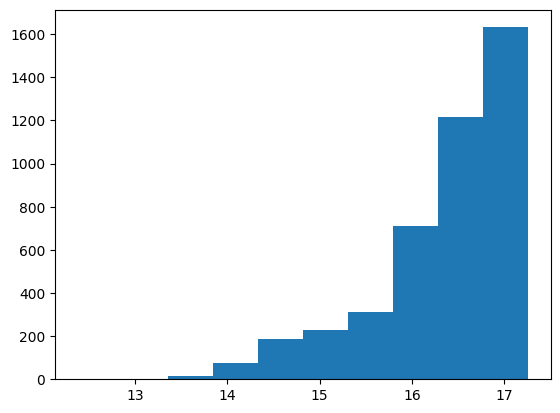

In [ ]:
#Check if target variable has a normal distribution

y_log = np.log(disp_df.iloc[:, -1:])
print(y_train_df)
print(y_log)


# Comprobar la distribución de la variable transformada
import matplotlib.pyplot as plt
plt.hist(y_log)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def rmse(y, y_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y, y_pred))

# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR()

pipe_regr = Pipeline([('scale', scaler),('SVM', svr)])
pipe_regr.fit(X=X_train_df, y=y_train_df.values.flatten())

print(f"RMSE of SVR with default hyper-pars: {rmse(y_val_df, pipe_regr.predict(X=X_test_df))}")


RMSE of SVR with default hyper-pars: 7950425.042740184


### SVR - Estudio de modelo lineal o no lineal

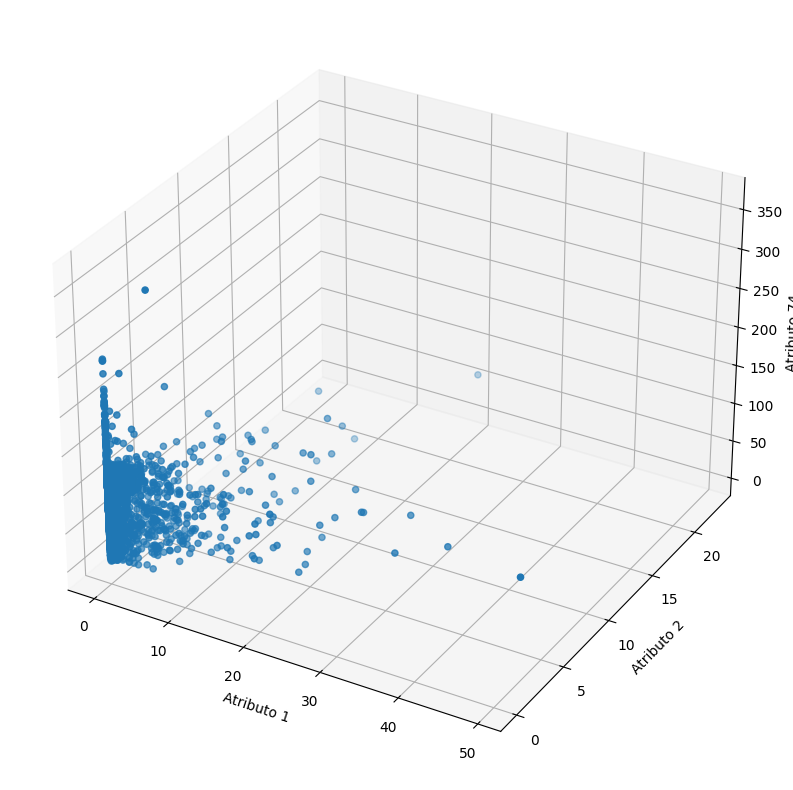

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Seleccionar los datos a plotear
x = disp_df.iloc[:, 0] # primer atributo
y = disp_df.iloc[:, 1] # segundo atributo
z = disp_df.iloc[:, -2] # penúltimo atributo

# Crear figura 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plotear los datos
ax.scatter(x, y, z)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Atributo 1')
ax.set_ylabel('Atributo 2')
ax.set_zlabel('Atributo 74')

plt.show()

### SVR - búsqueda de mejores hiperparámetros. 

Primero una breve explicación de cada uno de ellos. 

Epsilon: Si la variable de destino tiene un rango más grande, como valores en el rango [0, 100], es posible que desee usar un valor más grande de epsilon, como 1 o 10.

Degree: 



In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# definir los rangos de los hiperparámetros
param_distributions = {'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'SVM__C': uniform(loc=0.1, scale=4),
                       'SVM__gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=1).rvs(10)),
                       'SVM__degree': randint(low=1, high=5),
                       'SVM__coef0': uniform(loc=-1, scale=2)}

# definir el modelo y el pipeline
scaler = StandardScaler()
svr = SVR()
pipe_regr = Pipeline([('scale', scaler), ('SVM', svr)])

# definir la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=pipe_regr,
                                   param_distributions=param_distributions,
                                   n_iter=100,
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=1)

# realizar la búsqueda aleatoria
random_search.fit(X_train_df, y_train_df.values.flatten())

# imprimir los mejores hiperparámetros y el RMSE del modelo con esos hiperparámetros
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"RMSE of SVR with best hyperparameters: {rmse(y_val_df, random_search.predict(X=X_test_df))}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

### Random Forest

Primero, una primera descripción dee los parámetros importantes para Random Forest:

Los parámetros más importantes de RF son:
- `n_estimators`; número de árboles incluidos en el modelo.
- `max_depth`: profundidad máxima que pueden alcanzar los árboles.
- `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(`min_samples_split` * `n_samples`).
- `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(`min_samples_split` * `n_samples`).
- `max_features`: número de predictores considerados a en cada división. Puede ser:
  - Un valor entero
  - Una fracción del total de predictores. Se calcula como `max(1, int(max_features * n_features_in_))`. Si su valor es `1.0` tiene en cuenta todos los predictores
  - `“sqrt”`, raiz cuadrada del número total de predictores.
  - `“log2”`, log2 del número total de predictores.
  - `None`, utiliza todos los predictores (igual que `1.0`)
- `oob_score`: Si se calcula o no el out-of-bag R^2. Por defecto es `False` ya que aumenta el tiempo de entrenamiento.


**Entrenamiento del modelo**

<ipython-input-19-f8630fc4f5b0>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_rf.fit(X_train_df, y_train_df)


RMSE de RF: 3242525.8998162523


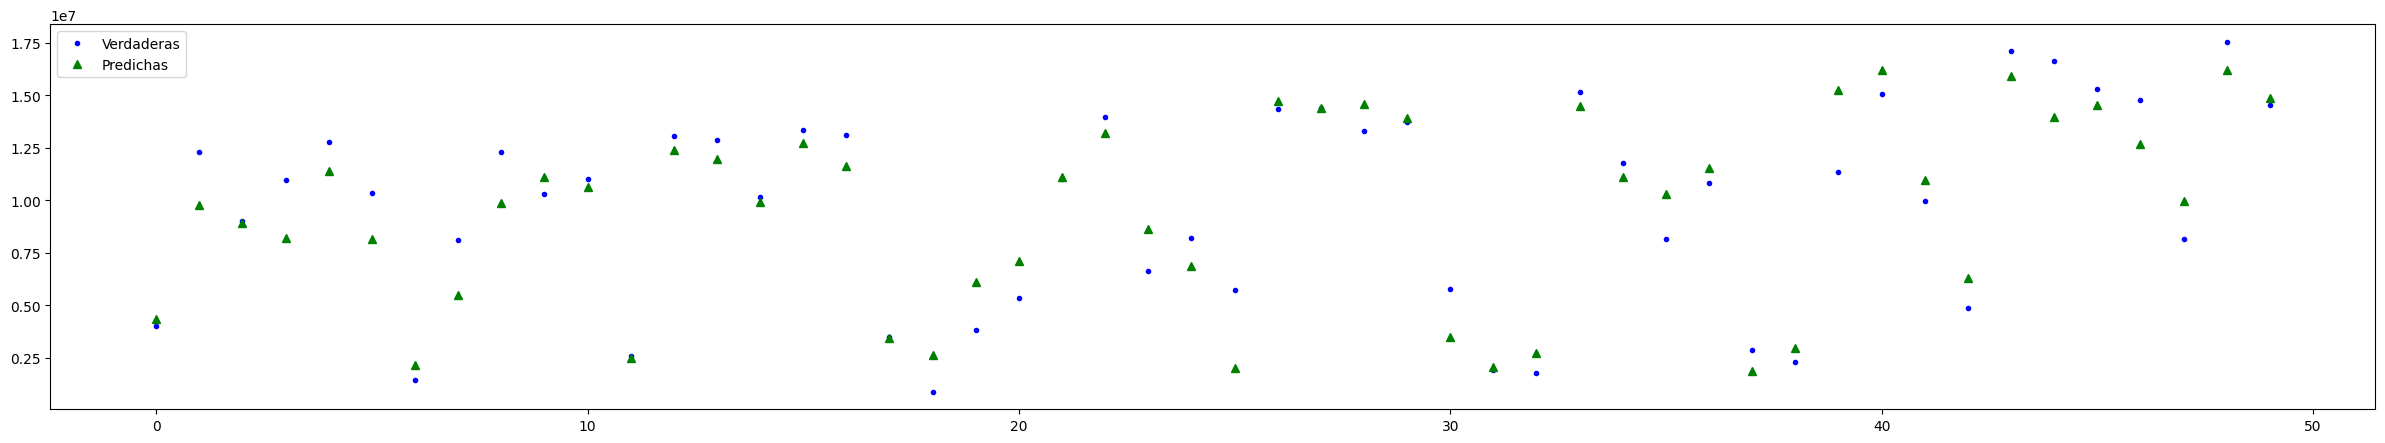

In [ ]:
# Para dibujar las predicciones y los valores reales
# ==============================================================================
def pintaResultadosRF (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_val_df[:n].size)
  pred = reg.predict(X=X_val_df)
  plt.plot(x, y_val_df[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();


# Creación del modelo
# ==============================================================================
regr_rf = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )

# Entrenamiento del modelo
# ==============================================================================
regr_rf.fit(X_train_df, y_train_df)
print(f"RMSE de RF: {rmse(y_val_df, regr_rf.predict(X=X_val_df))}")
pintaResultadosRF(regr_rf,50)

**Búsqueda de mejores hiperparámetros**

Aqui podemos tocar:

*   Budget
*   



In [ ]:
from scipy.stats import randint as sp_randint

param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X_train_df.shape[1]),
              'max_depth': sp_randint(1,20),
              'min_samples_leaf': sp_randint(1,20)}

inner = KFold(n_splits=3, shuffle=True, random_state=77)
outer = KFold(n_splits=5, shuffle=True, random_state=77)

budget = 20
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

np.random.seed(42)
regr.fit(X=X_train_df, y=y_train_df.values.flatten())


# Quitar comentario si se quiere evaluar el modelo
scores = -cross_val_score(regr, 
                            X_val_df, y_val_df.values.flatten(), 
                            scoring='neg_mean_squared_error', 
                            cv = outer)

print("Mejores hiperparámetros: ", regr.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros:  {'max_depth': 19, 'max_features': 24, 'min_samples_leaf': 3, 'n_estimators': 159}


Cosas a hacer viernes: 



*   Probar Random forest ejecución
*   Probar random forest busqueda de parámetros y hacer que nos printee una salida con el mejor parámetro. 
*   Incluir introducción de importancia de atrributos (en el T5 está explicado)
*   Empezar memoria desde 0 para ir cerrando cosas





### Importancia de Atributos 

Identifica la influencia que tiene cada predictor sobre una determinada métrica de evaluación del modelo 



In [ ]:
from sklearn.inspection import permutation_importance
import multiprocessing

modelo_final = regr.best_estimator_

importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train_df,
                y            = y_train_df.values.flatten(),
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 77
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_df.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,1.223790e+06,11330.519743,dswrf_s4_1
12,1.077662e+06,22193.607542,dswrf_s3_1
14,9.381416e+05,25158.494252,dswrf_s5_1
72,6.458084e+05,8300.371487,uswrf_s3_1
71,5.311427e+05,9898.268824,uswrf_s2_1
...,...,...,...
61,2.043416e+04,340.185491,ulwrf_s2_1
62,1.959252e+04,453.480334,ulwrf_s3_1
46,1.528333e+04,985.148912,tmin_2m2_1
70,1.511947e+04,883.156820,uswrf_s1_1


### Plot de la importancia

en la gráfica los datos más a la izquierda son los más importantes. La gráfica muestra la importancia relativa de cada característica en el modelo, en términos del cambio en la precisión del modelo al permutar aleatoriamente los valores de esa característica. Las características más importantes son las que causan el mayor cambio en la precisión del modelo al ser permutadas.

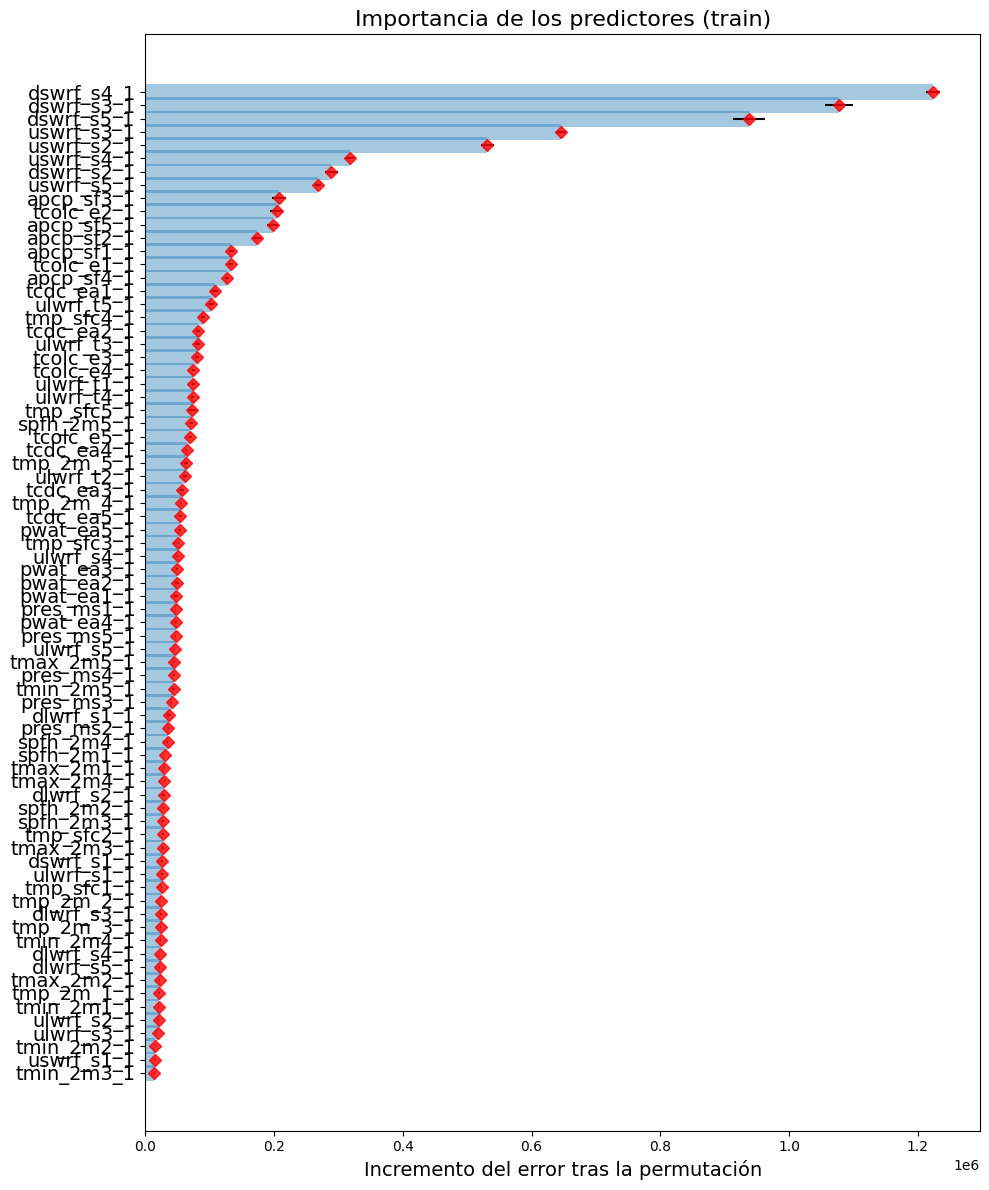

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(10, 12)) # aumentar el tamaño de la figura
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0.4, # disminuir la transparencia de las barras
    height=1.2 # aumentar la altura de las barras para separarlas más
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)', fontsize=16) # aumentar el tamaño de la fuente del título
ax.set_xlabel('Incremento del error tras la permutación', fontsize=14) # aumentar el tamaño de la fuente del eje X
ax.tick_params(axis='y', labelsize=14) # aumentar el tamaño de la fuente del eje Y
plt.tight_layout() # ajustar el espacio entre los elementos del gráfico
plt.show()


Arboles de Regresion